In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import load_model

In [37]:
from utils import read_big_pickle
# file is larger than 2GB, use pickle to read in by chunks
file_paths = ["data/sequence_train.pkl", "data/sequence_val.pkl", "data/sequence_test.pkl"]

genes_train = read_big_pickle(file_paths[0])
genes_val = read_big_pickle(file_paths[1])
genes_test = read_big_pickle(file_paths[2])


input_test = np.stack(genes_test["seq"], axis=0)

cell_types = genes_train.columns.values.astype(str)[:57]


In [40]:
experiment_tag = "C8D3P4M"

output_tests = {}

preds = pd.DataFrame()
exprs = pd.DataFrame()
exprs_log = pd.DataFrame()
preds_log = pd.DataFrame()



for cell_type in cell_types[:3]:
    output_tests[cell_type] = np.array(genes_test[cell_type])
    
    best_model = load_model("models/experiments_"  + experiment_tag + "_" + cell_type + ".hdf5")
    preds[cell_type] = best_model.predict(input_test[:200]).flatten()
    exprs[cell_type] = output_tests[cell_type]

    preds_log[cell_type] = np.log(preds[cell_type]+1)
    exprs_log[cell_type] = np.log(exprs[cell_type]+1)

/anaconda3/envs/bio/lib/python3.6/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


,E000,E003,E004
0,1.436088,0.948152,0.833070
1,1.531008,1.753582,1.566531
2,1.171881,1.411971,1.138029
3,1.547846,1.782900,1.389938
4,1.802734,1.502553,1.699396
5,2.027003,1.388307,1.133426
6,2.864280,2.039775,1.808076
7,2.287916,2.041749,1.894298
8,2.576637,2.379175,2.263861
9,0.344882,0.286993,0.164134


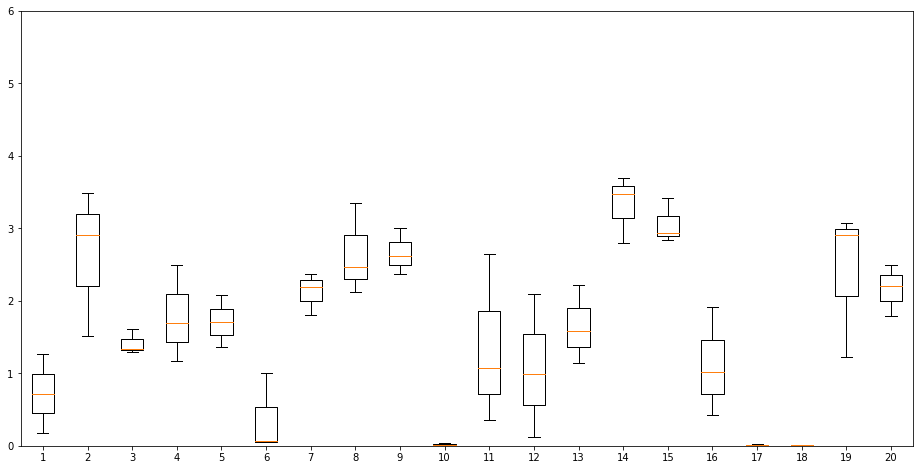

In [43]:

plt.figure(figsize=(16,8))
plt.ylim(0,6)
plt.boxplot(exprs_log[:20])
plt.show()

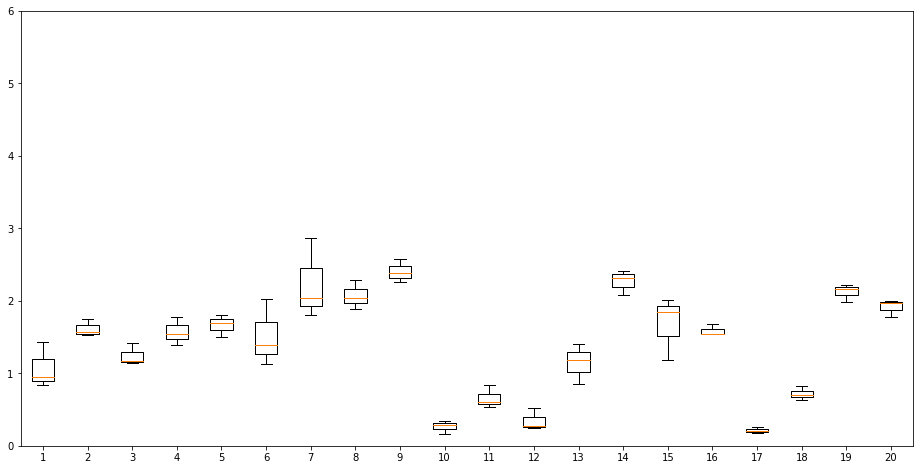

In [45]:
plt.figure(figsize=(16,8))
plt.ylim(0,6)
plt.boxplot(preds_log[:20])
plt.show()

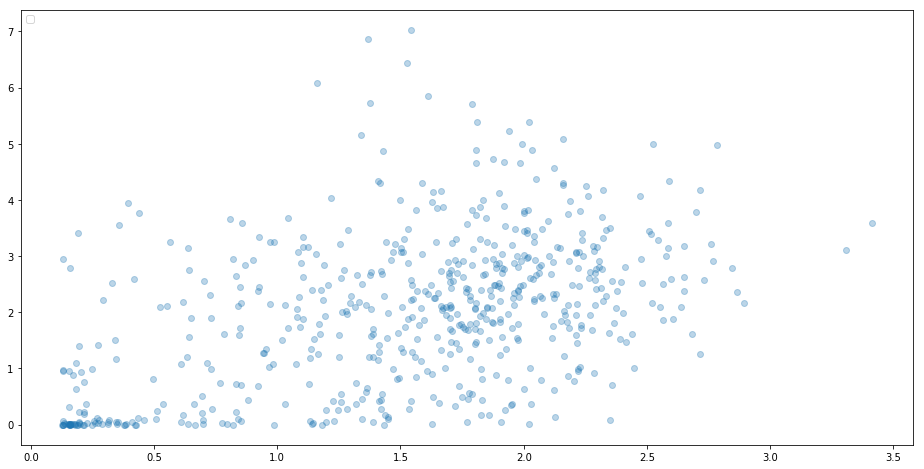

In [47]:
plt.figure(figsize=(16,8))
plt.legend(['pred', 'expr'], loc='upper left')
plt.scatter(preds_log[:200], exprs_log[:200], alpha=0.3)
plt.show()